In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/221213_mouse_kidney_processing.h5ad'

In [4]:
bdata=anndata.read_text('GSE107585_Mouse_kidney_single_cell_datamatrix.txt.gz')

In [5]:
bdata

AnnData object with n_obs × n_vars = 16273 × 43745

In [6]:
adata = bdata.T

In [7]:
adata

AnnData object with n_obs × n_vars = 43745 × 16273

normalizing counts per cell
    finished (0:00:02)


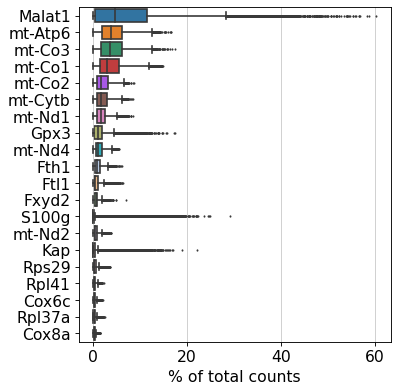

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [9]:
sc.pp.filter_cells(adata, min_genes=200)

In [10]:
sc.pp.filter_genes(adata, min_cells=3)

In [11]:
adata

AnnData object with n_obs × n_vars = 43745 × 16273
    obs: 'n_genes'
    var: 'n_cells'

In [12]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [13]:
adata.var

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Cluster_Number,43745,False,43745,4.317728,0.000000,188879.0
Rp1,57,False,57,0.001486,99.869699,65.0
Sox17,223,False,223,0.009670,99.490227,423.0
Mrpl15,5519,False,5519,0.140610,87.383701,6151.0
Lypla1,12006,False,12006,0.378900,72.554578,16575.0
...,...,...,...,...,...,...
AC125149.3,16,False,16,0.000389,99.963424,17.0
AC168977.1,21,False,21,0.000503,99.951995,22.0
PISD,10265,False,10265,0.308881,76.534461,13512.0
DHRSX,2290,False,2290,0.054886,94.765116,2401.0


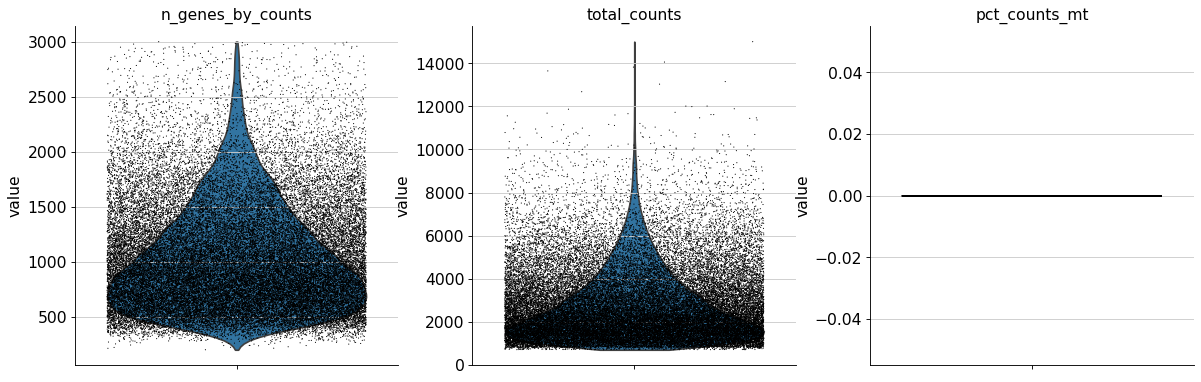

In [14]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

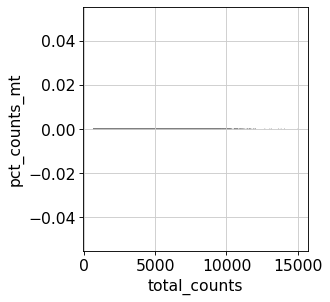

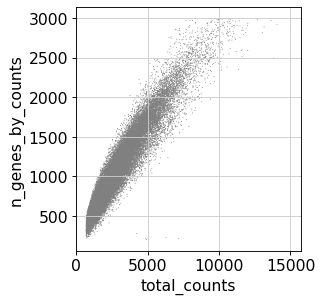

In [15]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [16]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/analysis/miniconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [18]:
sc.pp.log1p(adata)

In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


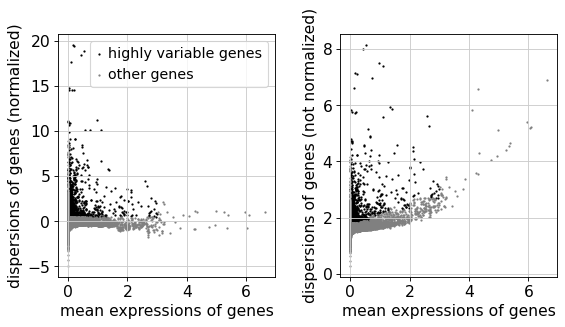

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
adata.raw = adata

In [22]:
adata = adata[:, adata.var.highly_variable]

In [23]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:38)


In [24]:
sc.pp.scale(adata, max_value=10)

In [25]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


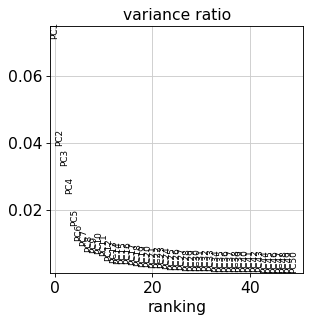

In [26]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=False)

In [27]:
adata.write(results_file)

In [28]:
adata

AnnData object with n_obs × n_vars = 43310 × 1296
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'